In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/Salary Data.csv')

In [ ]:
df.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [ ]:
null_values_df = df[df.isnull().any(axis=1)]

In [ ]:
df_cleaned = df.dropna()

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
# Fill null values in the 'Gender' column with the mode (most frequent value)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [ ]:
# Fill null values in categorical columns with mode
categorical_columns = ['Education Level', 'Job Title']
for column in categorical_columns:
    df[column].fillna(df[column].mode().iloc[0], inplace=True)

# Fill null values in numerical columns with mean
numerical_columns = ['Years of Experience', 'Salary']
for column in numerical_columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Check if null values are filled
print(df.isnull().sum())

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [ ]:
columns_to_remove = ['Age'	,'Gender','Job Title']
df = df.drop(columns=columns_to_remove)


In [ ]:
df.head()

,Education Level,Years of Experience,Salary
0,Bachelor's,5.0,90000.0
1,Master's,3.0,65000.0
2,PhD,15.0,150000.0
3,Bachelor's,7.0,60000.0
4,Master's,20.0,200000.0


In [ ]:
# Create a mapping dictionary for education levels
education_mapping = {
    "Bachelor's": 1,
    "Master's": 2,
    "PhD": 3,
    # Add more education levels as needed
}

# Map the education levels to numeric values
df['Education Level'] = df['Education Level'].map(education_mapping)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame

# Select the columns for linear regression
X = df[['Years of Experience', 'Salary', 'Education Level']]
y = df['Salary']  # Replace 'Target_Column' with the column you want to predict

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.97358676710252e-21


In [ ]:
import numpy as np

# Assuming df is your DataFrame

# Define a threshold to classify as 0 or 1
threshold = 10000  # Adjust the threshold as needed

# Convert continuous target variable into binary classes
df['Target_Class'] = np.where(df['Salary'] > threshold, 1, 0)

# Check the distribution of the target classes
print(df['Target_Class'].value_counts())

# Select the columns for logistic regression
X = df[['Years of Experience', 'Salary', 'Education Level']]
y = df['Target_Class']

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X, y)


Target_Class
1    374
0      1
Name: count, dtype: int64


LogisticRegression()

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming df is your DataFrame

# Select features (independent variables) and target (dependent variable)
X = df[['Years of Experience', 'Education Level']]
y = df['Salary']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Take input from the user
years_of_experience = float(input("Enter years of experience: "))
education_level = int(input("Enter education level (1 for Bachelor's, 2 for Master's, 3 for PhD): "))

# Predict salary for the input
new_data = pd.DataFrame({'Years of Experience': [years_of_experience], 'Education Level': [education_level]})
predicted_salary = model.predict(new_data)

print("Predicted Salary:", predicted_salary[0])


Enter years of experience: 6
Enter education level (1 for Bachelor's, 2 for Master's, 3 for PhD): 2
Predicted Salary: 81964.2696075731


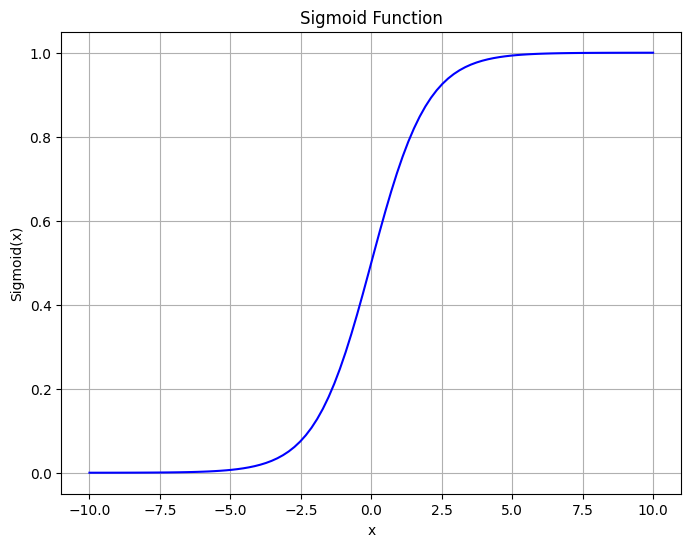

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate values for x
x_values = np.linspace(-10, 10, 100)

# Calculate corresponding y values using the sigmoid function
y_values = sigmoid(x_values)

# Plot the sigmoid curve
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, color='blue')
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.show()
